<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_5/dstep23_dsny_trash_part2_rvichot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Dept of Sanitation in NYC, Part 2: trends and periodicity**

*September 28, 2023*

This notebook will explore two questions related to waste removal by New York City's Department of Sanitation:

- ***What is the relationship between refuse and recycling?***

- ***Is there periodicity in the tonnage data?***

The data can be found [here](https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5).

---

### **From Part 1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,month,borough,district,refuse,paper,mgp,recy
2817,1995-01-01,Brooklyn,18,5183.1,623.0,391.1,1014.1
2818,1995-01-01,Queens,11,2713.2,553.2,261.2,814.4
2819,1995-01-01,Queens,04,3917.0,256.5,216.0,472.5
2820,1995-01-01,Manhattan,05,1289.6,225.7,100.4,326.1
2821,1995-01-01,Brooklyn,07,3275.3,277.8,291.8,569.6
...,...,...,...,...,...,...,...
19804,2018-12-01,Queens,13,4743.8,514.6,737.9,1252.5
19805,2018-12-01,Brooklyn,03,4068.9,368.7,313.1,681.8
19806,2018-12-01,Brooklyn,01,5289.1,678.2,451.4,1129.6
19807,2018-12-01,Queens,04,3884.0,369.1,382.7,751.8


,refuse,paper,mgp,recy
month,,,,
1995-01-01,216681.7,19193.1,13726.2,32919.3
1995-02-01,184028.8,16911.1,11729.4,28640.5
1995-03-01,219327.2,21334.5,14044.6,35379.1
1995-04-01,216040.5,19165.8,13076.9,32242.7
1995-05-01,248461.7,20038.7,13902.6,33941.3
...,...,...,...,...
2018-08-01,221575.1,25552.7,25323.4,50876.1
2018-09-01,209549.5,25429.3,23870.6,49299.9
2018-10-01,223356.6,25478.3,24869.0,50347.3


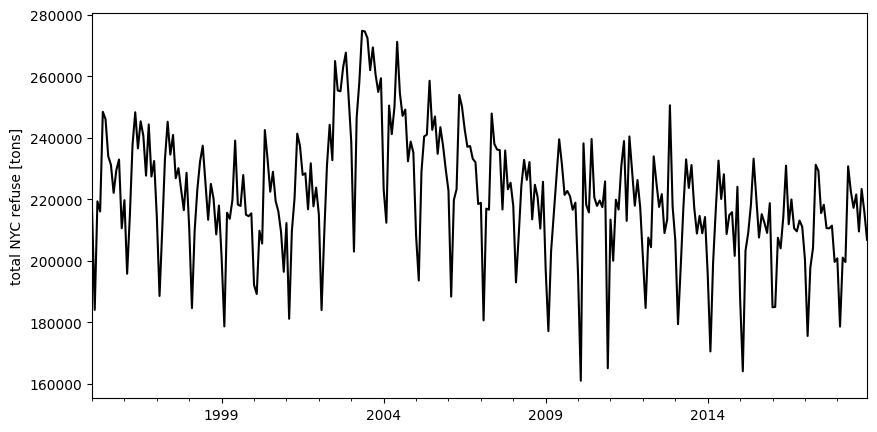

In [2]:
# -- set the filename and read the data while parsing the MONTH column
fname = "https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD"
dsny  = pd.read_csv(fname, parse_dates=["MONTH"])

# -- sub-select only the first six columns
cols = dsny.columns[:6]
dsny = dsny[cols]

# -- rename the columns for ease of use
dsny.columns = ["month", "borough", "district", "refuse", "paper", "mgp"]

# -- create a column that is all recycling
dsny["recy"] = dsny["paper"] + dsny["mgp"]

# -- sort by month values
dsny = dsny.sort_values("month", ignore_index=True)

# -- let's concentrate on 1995 to 2019 (16 years)
ind_tlo = dsny["month"] >= "1995-01-01"
ind_thi = dsny["month"] < "2019-01-01"
ind_tot = ind_tlo & ind_thi
dsny = dsny[ind_tot]

# -- convert NaNs to 0s (this is a CHOICE!)
dsny = dsny.fillna(0.0)

# -- group by month and sum to aggregate across the whole city
nyc_ts = dsny.groupby("month").sum(numeric_only=True)

# -- display the origina and result
display(dsny)
display(nyc_ts)

# -- plot the result
fig, ax = plt.subplots( figsize=(10, 5))
nyc_ts.plot(y="refuse", ylabel="total NYC refuse [tons]", xlabel="", legend=False, color="k", ax=ax)
fig.show()

### **Structure in Time Series Data and Filtering**

We see that there is a lot of variability in the time series data **"on multiple time scales"**.  We can isolate the short time scale behavior by removing trends.  Let's concentrate on Brooklyn for now:

In [3]:
# -- sub-select Brooklyn
bk = dsny[dsny['borough'] == "Brooklyn"]
bk_ts = bk.groupby("month").sum(numeric_only=True)

Let's plot Brooklyn again, but add some additional gridlines,

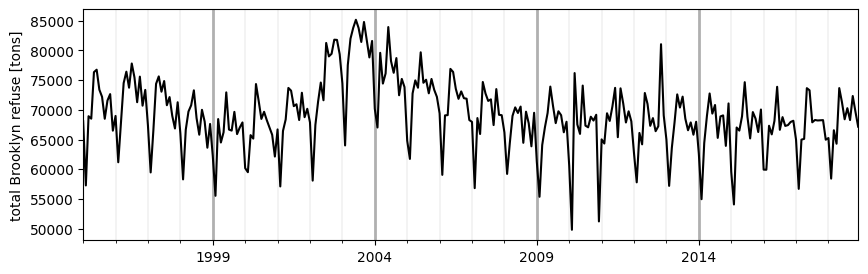

In [4]:
# -- plot total refuse for Brooklyn with minor grid lines
fig, ax = plt.subplots(figsize=(10, 3))
bk_ts.plot(y="refuse", color ="k", legend=False, ax=ax)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.2)
ax.set_xlabel("")
ax.set_ylabel("total Brooklyn refuse [tons]")
fig.show()

Zooming in a bit,

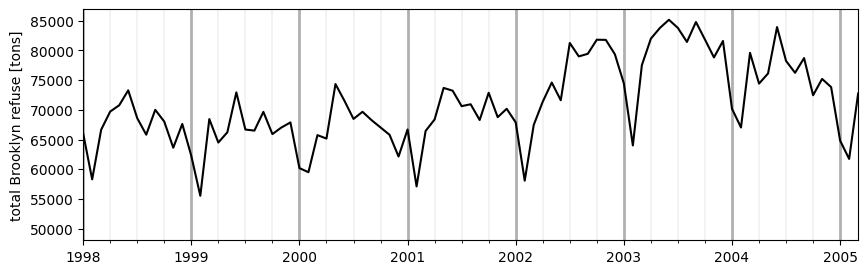

In [5]:
# -- restrict x-axis range
# -- plot total refuse for Brooklyn with minor grid lines
fig, ax = plt.subplots(figsize=(10, 3))
bk_ts.plot(y="refuse", color ="k", legend=False, ax=ax)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.2)
ax.set_xlabel("")
ax.set_xlim("1998-01-01","2005-03-01")
ax.set_ylabel("total Brooklyn refuse [tons]")
fig.show()

Convert units,

In [6]:
# -- display index
bk_ts.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='month', length=288, freq=None)

In [7]:
bk_ts.index.days_in_month

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name='month', length=288)

In [8]:
# -- divide by days in the month
bk_ts = bk_ts.divide(bk_ts.index.days_in_month, axis=0)

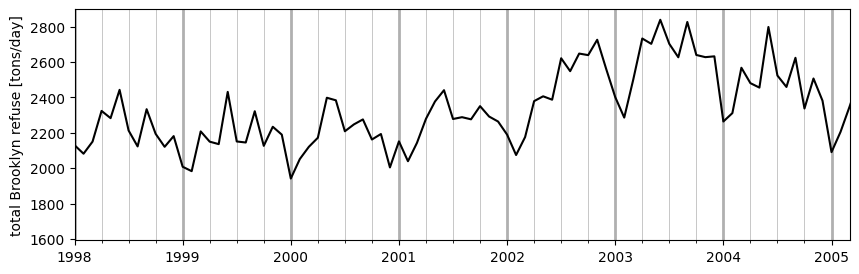

In [9]:
# -- restrict x-axis range
# -- plot total refuse for Brooklyn with minor grid lines
fig, ax = plt.subplots(figsize=(10, 3))
bk_ts.plot(y="refuse", color ="k", legend=False, ax=ax)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
ax.set_xlim("1998-01-01","2005-03-01")
ax.set_ylabel("total Brooklyn refuse [tons/day]")
fig.show()

In [10]:
# -- restrict x-axis range


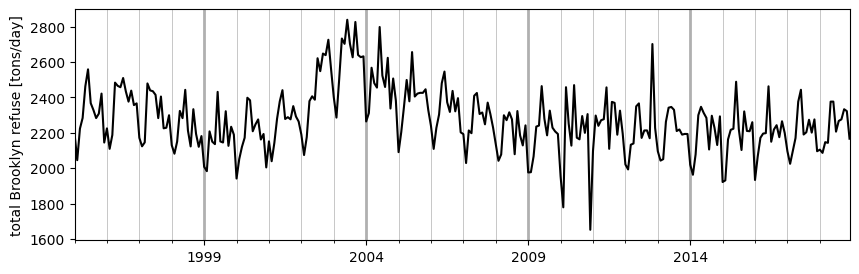

In [11]:
# -- plot total refuse for Brooklyn with minor grid lines
# -- restrict x-axis range
# -- plot total refuse for Brooklyn with minor grid lines
fig, ax = plt.subplots(figsize=(10, 3))
bk_ts.plot(y="refuse", color ="k", legend=False, ax=ax)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
#ax.set_xlim("1998-01-01","2005-03-01")
ax.set_ylabel("total Brooklyn refuse [tons/day]")
fig.show()

Sharp dips in Febrary have gone away, but it still seems that there are ***seasonal*** effects.  Let's look at all of the districts in BK,

In [12]:
bk_dist = bk.groupby(["district", "month"]).sum()
bk_dist.unstack("district")

<ipython-input-12-84282c89257a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bk_dist = bk.groupby(["district", "month"]).sum()


refuse                                                          \
district        01      02      03      04      05      06      07      08   
month                                                                        
1995-01-01  4762.5  2421.7  4258.1  3096.5  4468.8  3141.5  3275.3  2984.3   
1995-02-01  4039.9  2005.4  3604.4  2600.2  3776.9  2581.8  2762.4  2445.4   
1995-03-01  4724.3  2377.6  4361.7  3062.6  4585.0  3011.3  3285.2  2881.7   
1995-04-01  4887.6  2260.3  4223.3  2917.1  4451.5  2912.5  3152.8  2737.2   
1995-05-01  5029.7  2460.0  4847.2  3301.0  5273.5  3344.8  3654.9  3101.7   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-08-01  4810.4  2447.3  4307.4  3220.1  5161.9  2152.5  3370.8  2874.8   
2018-09-01  5352.8  2431.6  4055.0  2999.1  4519.1  2099.5  3209.2  2651.7   
2018-10-01  5760.0  2623.7  4345.1  3157.8  4780.0  2273.8  3466.7  2873.2   
2018-11-01  5454.4  2576.3  4298.5  3018.9  4643.4  2278.9  3302.7  2759.1   
2018-12-01  5289.1  2433.7  4068.9  2896.1  4381.4  2099.5  3176.2  2709.2   

                            ...   recy                                        \
district        09      10  ...     09      10      11      12     13     14   
month                       ...                                                
1995-01-01  3203.8  3307.0  ...  286.8   778.0   897.7   872.3  211.6  639.0   
1995-02-01  2637.8  2706.1  ...  257.6   659.3   747.6   725.2  177.2  514.1   
1995-03-01  3169.6  3220.3  ...  342.0   808.2   893.5   913.0  235.9  627.9   
1995-04-01  3124.8  3145.1  ...  299.6   734.9   831.7   889.1  200.3  616.2   
1995-05-01  3428.9  3580.1  ...  309.4   767.7   904.1   873.4  222.9  622.4   
...            ...     ...  ...    ...     ...     ...     ...    ...    ...   
2018-08-01  3118.8  3291.5  ...  531.5   933.3  1137.7   995.6  441.2  819.1   
2018-09-01  3076.4  3145.0  ...  503.4   922.0  1106.0  1171.8  391.1  894.1   
2018-10-01  3252.7  3419.5  ...  488.3   974.2  1139.2  1110.3  410.4  896.9   
2018-11-01  3092.7  3432.6  ...  530.7  1016.0  1175.2  1125.3  424.7  884.7   
2018-12-01  3057.5  3150.1  ...  512.4  1006.4  1158.3  1130.6  381.7  947.8   

                                          
district        15     16     17      18  
month                                     
1995-01-01   837.3  117.1  472.3  1014.1  
1995-02-01   737.6  108.1  403.6   837.6  
1995-03-01   865.9  144.8  517.7  1048.0  
1995-04-01   850.2  133.2  472.4   969.8  
1995-05-01   893.8  144.0  507.7  1063.7  
...            ...    ...    ...     ...  
2018-08-01  1047.2  293.2  806.7  1231.8  
2018-09-01  1122.4  272.9  733.3  1160.4  
2018-10-01  1117.0  257.7  739.6  1130.8  
2018-11-01  1121.7  280.6  759.7  1204.3  
2018-12-01  1136.7  300.4  789.2  1244.3  

[288 rows x 72 columns]

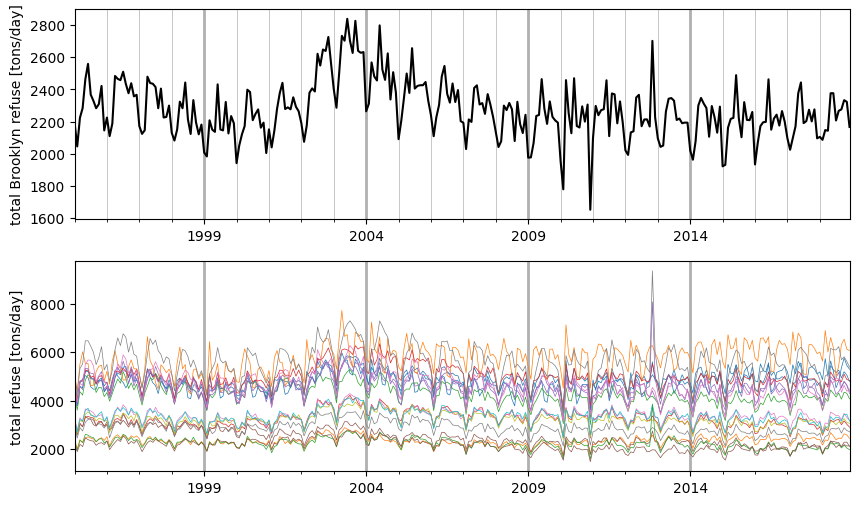

In [23]:
# -- plot total refuse and refuse of individual districts
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

bk_ts.plot(y="refuse", legend=False, color="k", ax=ax[0])
ax[0].grid(axis="x", which="major", lw=2)
ax[0].grid(axis="x", which="minor", lw=0.5)
ax[0].set_xlabel("")
ax[0].set_ylabel("total Brooklyn refuse [tons/day]")

bkdist = bk.groupby(["district", "month"]).sum(numeric_only=True)
bkdist.unstack("district").plot(y="refuse", lw=0.5, legend=False, ax=ax[1])

ax[1].grid(axis="x", which="major", lw=2)
ax[1].set_xlabel("")
ax[1].set_ylabel("total refuse [tons/day]")

fig.show()

Long time scale trends can be found by "filtering" time series data.  One of the most common is the rolling mean:

In [14]:
# -- take the rolling mean of the Brooklyn refuse with a quarterly window
bk_ts_03 = bk_ts.rolling(3, center=True).mean()
bk_ts_12 = bk_ts.rolling(12, center=True).mean()

Text(0, 0.5, 'total Brooklyn refuse [tons/day]')

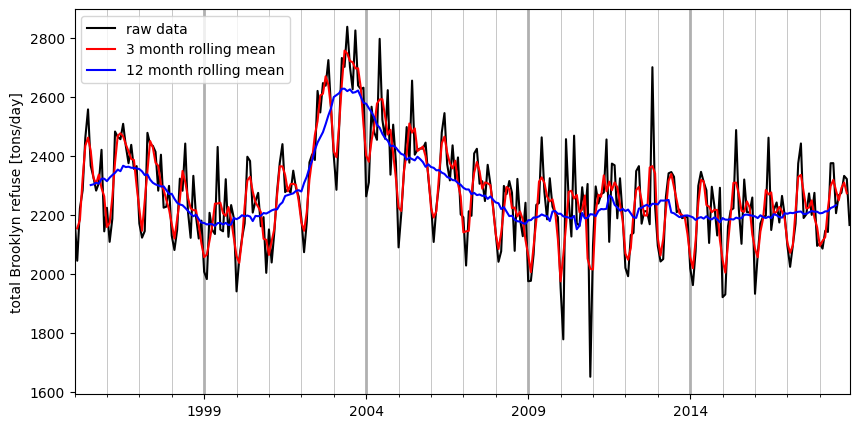

In [25]:
# -- plot the two
fig, ax = plt.subplots(figsize=(10, 5))
bk_ts.plot(y="refuse", color="k", label="raw data", ax=ax)
bk_ts_03.plot(y="refuse", color="r", label="3 month rolling mean", ax=ax)
bk_ts_12.plot(y="refuse", color="b", label="12 month rolling mean", ax=ax)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
ax.set_ylabel("total Brooklyn refuse [tons/day]")

So the 12 month rolling mean is showing is giving us the long time scale behavior.  What if we compare the smoothed refuse to recycling?:

Text(0, 0.5, 'total Brooklyn tons/day')

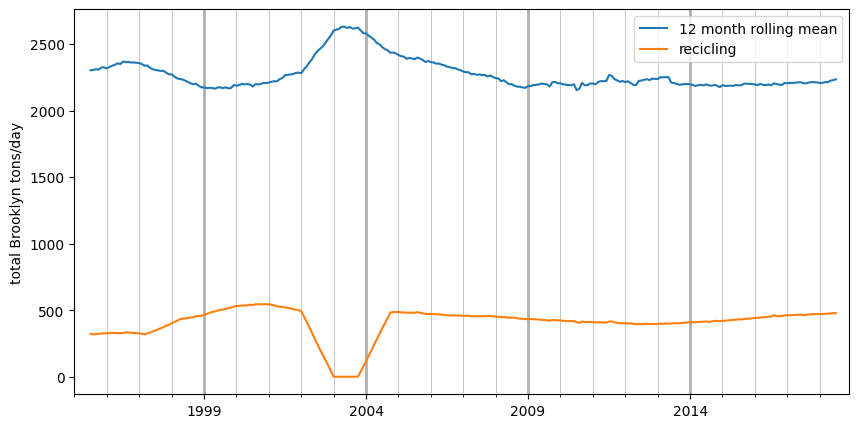

In [28]:
# -- plot refuse and recycling
fig, ax = plt.subplots(figsize=(10, 5))
bk_ts_12.plot(y=["refuse", "recy"], label=["12 month rolling mean", "recicling"], ax=ax)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
ax.set_ylabel("total Brooklyn tons/day")

[This WNYC story](https://www.wnyc.org/story/bloomberg-and-garbage-pile-unfinished-business/) provides some context that might help explain some of the characteristics of this plot.

### **Covariance and correlation**

The above plot is interesting for a few reasons...  Let's try to calcuate the correlation coefficient between the two:

&nbsp;&nbsp;&nbsp; <big> **$C = \frac{cov(v_1, \ v_2)}{\sigma_{v_1} \sigma_{v_2}}$** </big>

&nbsp;&nbsp;&nbsp; **$cov(v_1, \ v_2) = \sum_i \frac{(v_{1, i} \ - \  \bar{v}_1) \ (v_{2, i} \ - \  \bar{v}_2)}{\sqrt{N- 1}} $**

Perhaps put more simply,

&nbsp;&nbsp;&nbsp; **$C = \langle v_1^{\prime} \cdot v_2^{\prime} \rangle$**

where

&nbsp;&nbsp;&nbsp; $v_1^{\prime} = \frac{v_1 \ - \ \langle v_1 \rangle}{\sigma_{v_1}}$ <small> &nbsp;&nbsp;&nbsp; this is called <u>**standardization**</u></small>

<Axes: xlabel='recy', ylabel='refuse'>

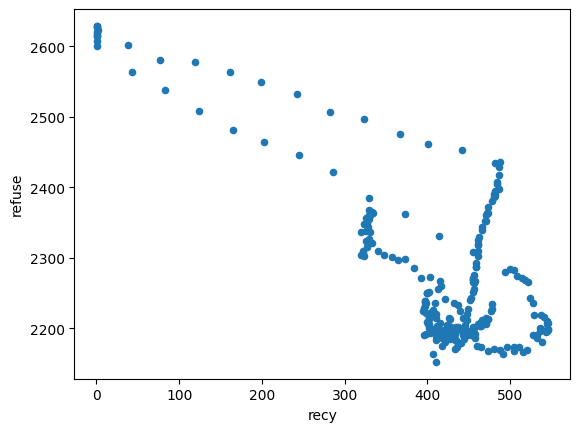

In [29]:
# -- to visualize, make a scatter plot of the tonnage values
bk_ts_12.plot("recy", "refuse", kind="scatter")

The correlation coefficient defined as above *ranges from 1 (perfectly correlated) to -1 (perfectly anti-correlated)*.

In [30]:
# -- calculate Pearson correlation coefficient
bk_ts_12.corr()

,refuse,paper,mgp,recy
refuse,1.000000,-0.401365,-0.751558,-0.773210
paper,-0.401365,1.000000,0.686164,0.752846
mgp,-0.751558,0.686164,1.000000,0.968744
recy,-0.773210,0.752846,0.968744,1.000000


**<u>ANSWER TO FIRST QUESTION</u>: Refuse and Recycling are <i>anti</i>-correlated <small>(in Brooklyn)</small>.**

### **Auto-Correlation: Determining Periodicity**

We can remove the smoothed time series from the raw data to isolate the short time scale (aka "high frequency") behavior:

In [19]:
# -- isolate short time scale behavior
bk_short =

SyntaxError: ignored

In [ ]:
# -- plot the the short time scale (high frequency) behavior


There does *seem* to be some periodicity in this time series.  We can extract that periodicity by extending the concept of correlation to <u>auto-correlation</u> which is the correlation of a time series with itself **shifted by some time lag**.

In [ ]:
# -- plot autocorrelation function


**<u>ANSWER TO SECOND QUESTION</u>: Refuse has periodicity on annual time scales <small>(in Brooklyn)</small>.**